<font size="5">Programmazione di Applicazioni Data Intensive 2020/2021 - Progetto

- Romagnoli Giacomo

- Parrinello Angelo

# Introduzione al problema




Ci troviamo sempre più spesso nella condizione di affidarci al giudizio di esperti per decretare la qualità di un vino. Fortunatamente il consumatore, scarsamente dotato in gusto e olfatto, può affidarsi a metri di giudizio scientifici per rendersi autonomo nella scelta.

Il progetto ha come **obbiettivo** quello di definire la qualità (buona o scadente) di un vino in base alle sue caratteristiche fisiche. 

In materia il problema è definito di **classificazione**.

#Caricamento Librerie

Per prima cosa carichiamo le librerie per effettuare operazioni sui dati


*   **Numpy** per creare e operare su array a N dimensioni
*   **Pandas** per caricare e manipolare dati tabulari
*   **Matplotlib** per creare grafici

Importiamo le librerie usando i loro alias convenzionali e abilitando l'inserimento dei grafici inline.

In [6]:
import csv
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

#Descrizione del problema

- Carichiamo dalla repo di Github il dataset contenente la matrice dei vini con le loro caratteristiche.

In [1]:
import os

wine_zip = "wine.zip"

if not os.path.exists(wine_zip):
    from urllib.request import urlretrieve
    urlretrieve("https://github.com/AngeloParrinello/Wine-Quality-Classification/blob/main/wine.zip?raw=true", wine_zip)
    

In [2]:
from zipfile import ZipFile

!unzip "wine.zip"

Archive:  wine.zip
  inflating: wine.csv                


- Usiamo la funzione `read_csv` per importare i dati contenuti nel file "wine.csv", specificando il separatore.

In [9]:
data = pd.read_csv("wine.csv", delimiter=";")

- Analizziamo ora i dati, partendo dalla dimensione della matrice.

In [10]:
data.shape

(6440, 12)

- Le colonne, ovvero le features, da cui è composta.

In [11]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

- Ed una piccola sezione della matrice appena importata: in questo caso visualizziamo 5 dati partendo dal fondo.

In [12]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6435,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6436,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6437,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6438,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6439,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


Come si nota, il dataset contiene 6440 righe e 12 colonne.
Ogni riga costituisce un *vino registrato*. Questi dati sono stati raccolti da un'azienda vinicola portoghese. 
Di ogni vino abbiamo le seguenti *feature fisiche*:

- **fixed acidity** : *acidità fissa*. Misurato in g/L.
- **volatile acidity** : *acidità volatile*. Misurato in g/L.
- **citric acid** : *acido citrico*. Misurato in g/L.
- **residual sugar** : *zucchero residuo*. Misurato in g/L.
- **chlorides** : *cloruri*. Misurato in g/L.
- **free sulfur dioxide** : *anidride solforosa libera*. Misurata mg/L.
- **total sulfur dioxide** : *anidride solforosa totale*. Misurata mg/L.
- **density** : *densità*. Misurata g/mL.
- **pH** : *pH*.
- **sulphates** : *solfati*. Misurata in g/L.
- **alcohol** : *alcool*. Misurata in percentuale, sul totale della soluzione. 

Utilizziamo il metodo *info* per vedere la memoria occupata dal DataFrame e i tipi delle colonne assegnati da Pandas, al fine di conoscere il tipo delle variabili con cui lavoreremo.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6440 entries, 0 to 6439
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6440 non-null   float64
 1   volatile acidity      6440 non-null   float64
 2   citric acid           6440 non-null   float64
 3   residual sugar        6440 non-null   float64
 4   chlorides             6440 non-null   float64
 5   free sulfur dioxide   6440 non-null   float64
 6   total sulfur dioxide  6440 non-null   float64
 7   density               6440 non-null   float64
 8   pH                    6440 non-null   float64
 9   sulphates             6440 non-null   float64
 10  alcohol               6440 non-null   float64
 11  quality               6440 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 603.9 KB


Per le finalità del progetto la colonna **Quality** fornisce informazioni eccessive. E' quindi necessario operare una trasformazione su quest'ultima. Nello specifico sostituiremo il valore intero attuale con un booleano: se la qualità è maggiore o uguale a 6 allora verrà etichettato come "Good" altrimenti come "Bad"; assumendo due valori, dunque, possiamo dire che è una variabile categorica e possiamo convertirla nel tipo appropriato risparmiando memoria, anche se è un dataset di piccole dimensioni. Anche la variabile *alcohol* è di tipo object e anch'essa va trasformata, questa volta in float.  

Andiamo ora a mappare la variabile da predire ovvero *quality*.

- Creiamo quindi una banale funzione che adempi questo scopo.

In [16]:
def convert_value(i):
  if i >= 6:
    return 'Good'
  else:
    return 'Bad'

- Attraverso la funzione *apply* di Pandas, applichiamo la funzione appena creata alla colonna **Quality**.

In [17]:
data.quality = data.quality.apply(convert_value)

In [18]:
data['quality'].unique()

array(['Good', 'Bad'], dtype=object)

In [19]:
data.tail()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6435,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,Bad
6436,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,Good
6437,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,Good
6438,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,Bad
6439,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,Good


- Una volta mappata *quality*, rendiamola del corretto tipo. Così come *alcohol*.

In [20]:
data = data.astype({'quality': 'category', 'alcohol': 'float64'})

- Tutti gli altri attributi sono variabili continue di tipo float e notiamo anche che non abbiamo valori nulli.

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6440 entries, 0 to 6439
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         6440 non-null   float64 
 1   volatile acidity      6440 non-null   float64 
 2   citric acid           6440 non-null   float64 
 3   residual sugar        6440 non-null   float64 
 4   chlorides             6440 non-null   float64 
 5   free sulfur dioxide   6440 non-null   float64 
 6   total sulfur dioxide  6440 non-null   float64 
 7   density               6440 non-null   float64 
 8   pH                    6440 non-null   float64 
 9   sulphates             6440 non-null   float64 
 10  alcohol               6440 non-null   float64 
 11  quality               6440 non-null   category
dtypes: category(1), float64(11)
memory usage: 559.9 KB


#Analisi Esplorativa dei Dati

Iniziamo ora *l'analisi esplorativa dei dati* ove questi vengono analizzati, esplorati e si apprendono le prime informazioni generiche a riguardo, che guideranno i passi successivi. In questa fase cercheremo anche eventuali correlazioni tra essi e risolveremo imprecisioni del dataset.

- Utilizziamo la funzione *describe*() per iniziare a comprendere come sono distribuiti i dati. 

- Per evitare disambiguità al lettore precisiamo che la riga con scritto 25% (25-esimo), 50% (50-esimo) e 75% (75-esimo) stanno ad indicare il *percentile*. In breve, considerando la prima colonna e la riga del 25-esimo percentile, 6.4 è il valore sotto il quale si trovano il 25% di osservazioni. 

In [22]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6440.000000,6440.000000,6440.000000,6440.000000,6440.000000,6440.000000,6440.000000,6440.000000,6440.000000,6440.000000,6440.000000
mean,7.221234,0.339324,0.318899,5.447857,0.056066,30.497826,115.736258,1.717233,3.218694,0.531252,10.489489
std,1.295466,0.164457,0.145491,4.766354,0.035122,17.745887,56.580720,7.669512,0.160926,0.148952,1.193030
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992358,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994900,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,103.898000,4.010000,2.000000,14.900000


- Per analizzare la distribuzione dei valori nella colonna nominale *quality*, possiamo utilizzare *value_counts*, specificando anche *normalize=True*, se vogliamo visualizzare la percentuale.

In [23]:
data["quality"].value_counts()

Good    4074
Bad     2366
Name: quality, dtype: int64

In [24]:
data["quality"].value_counts(normalize=True)

Good    0.632609
Bad     0.367391
Name: quality, dtype: float64

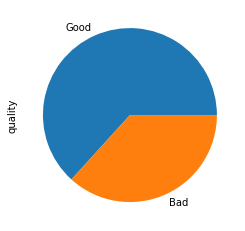

In [25]:
data["quality"].value_counts().plot.pie();

- Dai grafici possiamo notare che le classi sono **sbilanciate**, cioè sono presenti molti più vini buoni rispetto a quelli cattivi. Questa peculiarità del dataset potrebbe creare problemi in fase di learning del modello: andranno bilanciate le classi.

- Visualizziamo la distribuzione dei valori delle feature del nostro dataset in degli **istogramma**.

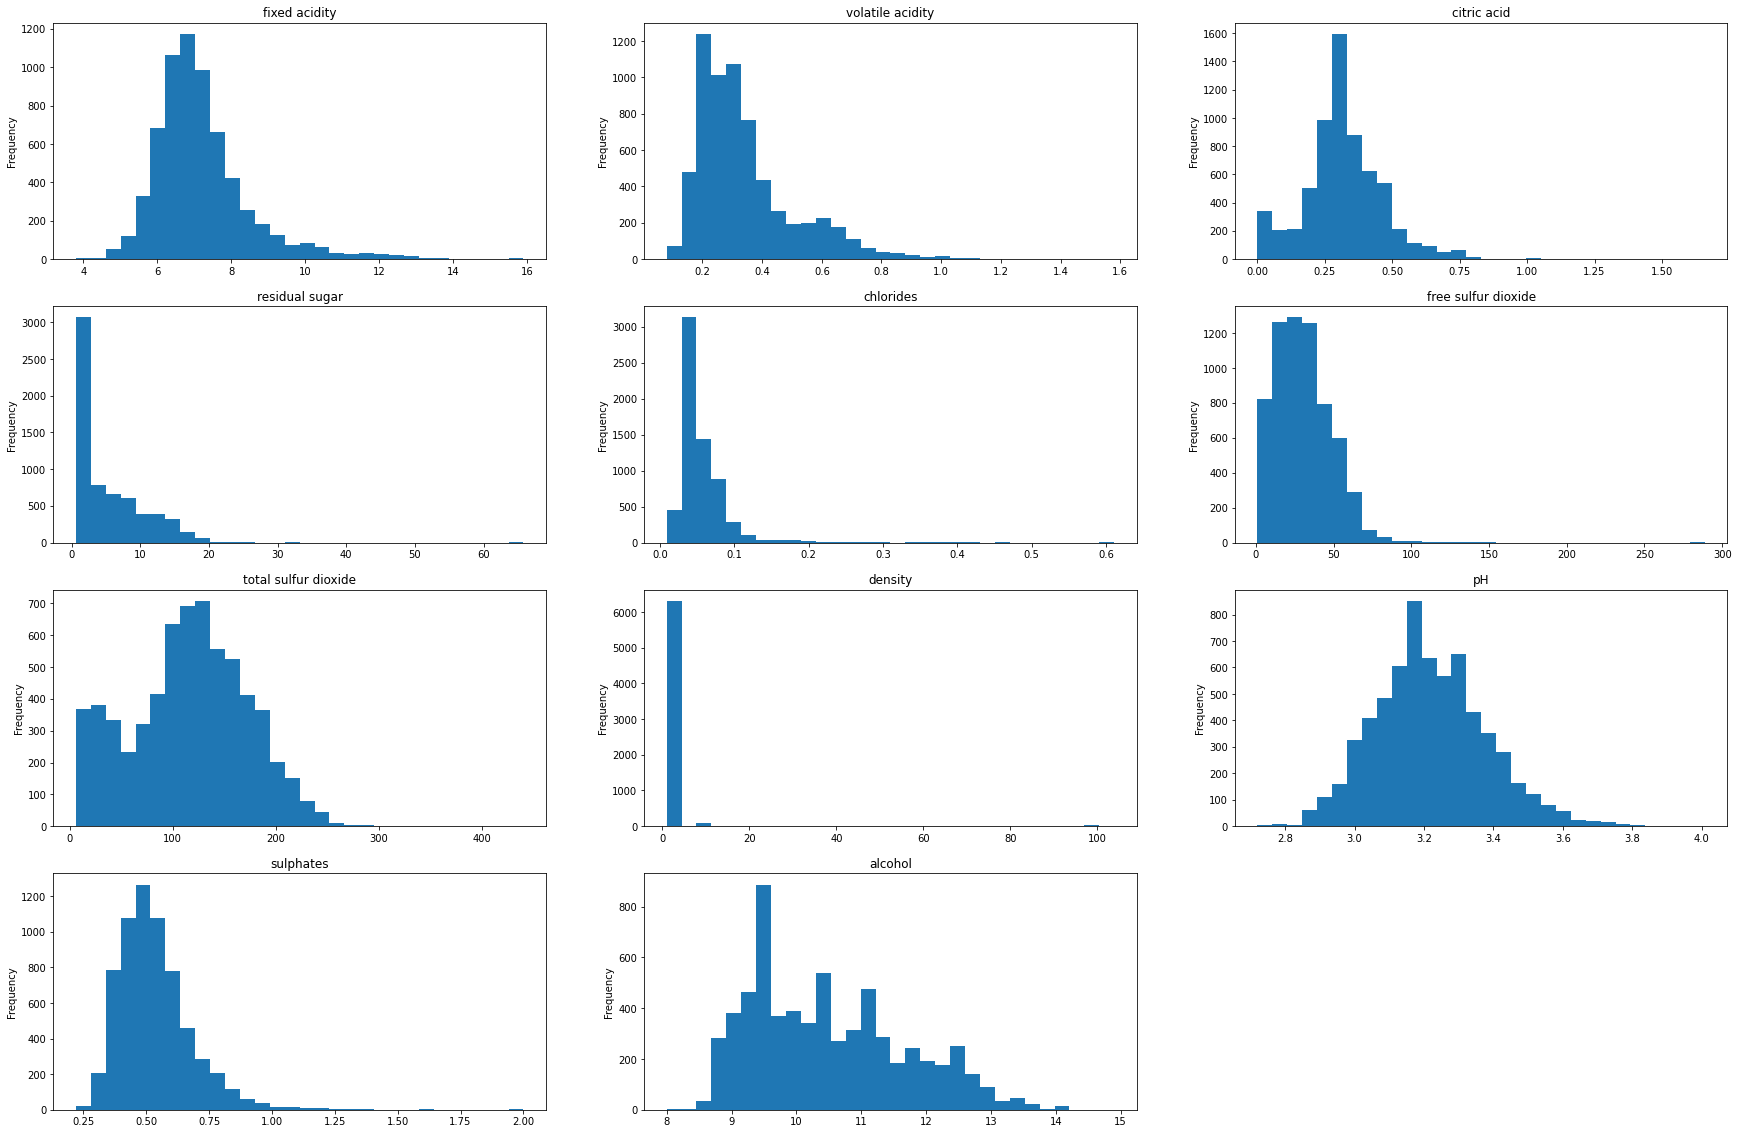

In [27]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(30, 20));
for n, value in enumerate(["fixed acidity", "volatile acidity", "citric acid", "residual sugar",
                           "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"], start=1):
  data[value].plot.hist(ax=plt.subplot(4,3,n), bins=30);
  plt.subplot(4, 3, n).set_title(value);

- Per maggiore dettaglio gli istogrammi, ma anche altri grafici in questo notebook, saranno ripetuti per ogni feature del dataset.

- Possiamo notare, ad esempio, che la maggior parte di vini ha una densità compresa tra 0 e 20 g/mL mentre molto pochi sono estremamente densi.

In [28]:
#percentuale dei vini estremamente densi
(len(data[data.density > 20]) / len(data.density)) * 100

0.5900621118012422

- Possiamo anche farci un'idea più numerica della distribuzione di queste feature. Quindi eseguiamo il **binning o discretizzazione** delle colonne numeriche, utilizzando la funzione *cut*, suddividendo così i valori in fasce di uguale ampiezza per contarne poi i valori in ciascuna. 

In [29]:
datino = data.columns.drop("quality")
for value in datino:
  print(pd.cut(data[value],4).value_counts()) #4 fasce uguali
  print("\n")

(6.825, 9.85]     3260
(3.788, 6.825]    2868
(9.85, 12.875]     286
(12.875, 15.9]      26
Name: fixed acidity, dtype: int64


(0.0785, 0.455]    5201
(0.455, 0.83]      1146
(0.83, 1.205]        89
(1.205, 1.58]         4
Name: volatile acidity, dtype: int64


(-0.00166, 0.415]    5085
(0.415, 0.83]        1342
(0.83, 1.245]          12
(1.245, 1.66]           1
Name: citric acid, dtype: int64


(0.535, 16.9]    6276
(16.9, 33.2]      163
(49.5, 65.8]        1
(33.2, 49.5]        0
Name: residual sugar, dtype: int64


(0.0084, 0.16]    6330
(0.16, 0.31]        87
(0.31, 0.46]        19
(0.46, 0.611]        4
Name: chlorides, dtype: int64


(0.712, 73.0]     6352
(73.0, 145.0]       86
(217.0, 289.0]       1
(145.0, 217.0]       1
Name: free sulfur dioxide, dtype: int64


(114.5, 223.0]    3269
(5.566, 114.5]    3034
(223.0, 331.5]     134
(331.5, 440.0]       3
Name: total sulfur dioxide, dtype: int64


(0.884, 26.715]     6402
(78.17, 103.898]      38
(52.443, 78.17]        0
(26.71

- E' facile notare come molte proprietà dei nostri vini hanno divisione dei valori simili tra loro: la distribuzione non è molto omogenea.

- Visualizziamo ora le statistiche di base sui valori delle feature mediante *boxplot*.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6440 entries, 0 to 6439
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         6440 non-null   float64 
 1   volatile acidity      6440 non-null   float64 
 2   citric acid           6440 non-null   float64 
 3   residual sugar        6440 non-null   float64 
 4   chlorides             6440 non-null   float64 
 5   free sulfur dioxide   6440 non-null   float64 
 6   total sulfur dioxide  6440 non-null   float64 
 7   density               6440 non-null   float64 
 8   pH                    6440 non-null   float64 
 9   sulphates             6440 non-null   float64 
 10  alcohol               6440 non-null   float64 
 11  quality               6440 non-null   category
dtypes: category(1), float64(11)
memory usage: 559.9 KB


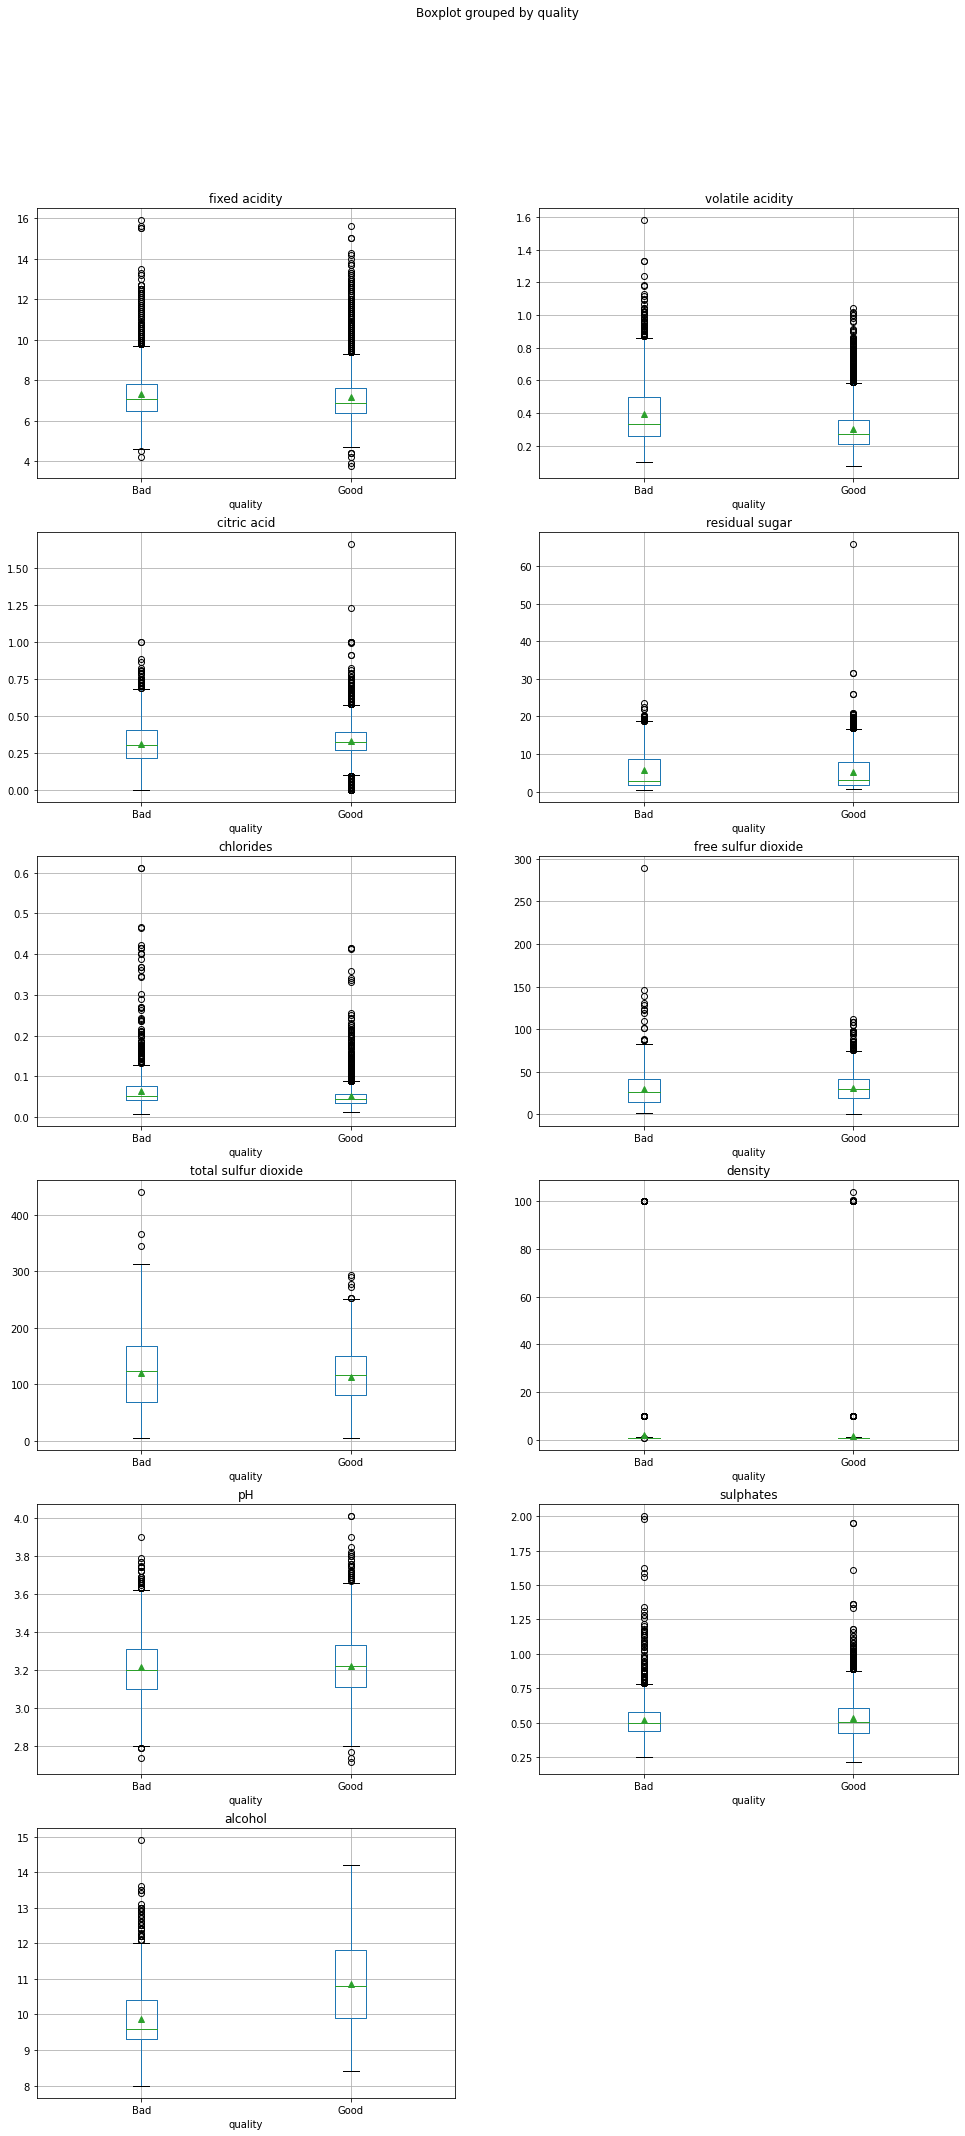

In [ ]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 
plt.figure(figsize=(16, 35))
data.boxplot(ax=plt.subplot(6,2,1), column="fixed acidity", by="quality", showmeans=True);
data.boxplot(ax=plt.subplot(6,2,2), column="volatile acidity", by="quality", showmeans=True);
data.boxplot(ax=plt.subplot(6,2,3), column="citric acid", by="quality", showmeans=True);
data.boxplot(ax=plt.subplot(6,2,4), column="residual sugar", by="quality", showmeans=True);
data.boxplot(ax=plt.subplot(6,2,5), column="chlorides", by="quality", showmeans=True);
data.boxplot(ax=plt.subplot(6,2,6), column="free sulfur dioxide", by="quality", showmeans=True);
data.boxplot(ax=plt.subplot(6,2,7), column="total sulfur dioxide", by="quality", showmeans=True);
data.boxplot(ax=plt.subplot(6,2,8), column="density", by="quality", showmeans=True);
data.boxplot(ax=plt.subplot(6,2,9), column="pH", by="quality", showmeans=True);
data.boxplot(ax=plt.subplot(6,2,10), column="sulphates", by="quality", showmeans=True);
data.boxplot(ax=plt.subplot(6,2,11), column="alcohol", by="quality", showmeans=True);

- **ALCOHOL**: nei vini di scarsa qualità la percentuale media di alcool è più bassa rispetto ai vini di alta qualità, che però hanno una maggiore distribuzione.
- **SULPHATES**: fra buoni e cattivi vini non notiamo una grosse differenze riguardo la media, unica discriminante la maggior presenza di outliners nei vini cattivi spostati più verso il massimo. 
- **pH**: il pH nei vini di maggior pregio è leggermente più alto, quindi un vino neutro ma tendente al basico, rispetto ai vini peggiori.
- **DENSITY**: il boxplot relativo alla densità non ci è molto di aiuto: infatti la stragrande maggioranza dei vini ha una bassissima densità, come già avevamo notato.
- **TOTAL SULFUR DIOXIDE**: l'anidride solforosa totale è tendezialmente più bassa nei vini "good". Come si vede, infatti, nei vini di scarsa qualità arriviamo a toccare i 400 mg/L.
- **FREE SULFUR DIOXIDE**: l'anidride solforosa libera è simile in entrambe le categorie di vini. Notare il picco di un dato ben oltre il baffo superiore del boxplot.
- **CHLORIDES**: osservando il grafico relativo ai cloridi notiamo che ambo le tipologie di vini che stiamo analizzando hanno diversi outliers, ma in media i cloridi sono più bassi nei vini buoni.
- **RESIDUAL SUGAR**: lo zucchero residuo è simile in entrambi i tipi di vino.
- **CITRIC ACID**: l'acido citrico è simile in entrambi i tipi di vino.
- **VOLATILE ACIDITY**: l'acidità volatile è sensibilmente inferiore nel massimo per i vini buoni.
- **FIXED ACIDITY**: l'acidità fissa è simile in entrambi i tipi di vino.

- Tra le features presentate quelle che ipotiziamo siano più rilevanti sono: l'alcool, l'anidride solforosa totale e l'acidità volatile. Questo perchè notiamo sostanziali differenze nelle due categorie di vino.

- Con l'operazione di *pivoting* possiamo sdoppiare ciscuna colonna del dataframe, suddividendo i valori relativi alle classi good e bad, al fine di visualizzare meglio quanto le variabili predittive siano correlate con la classe da predire.

In [30]:
data.pivot(columns="quality")

fixed acidity      volatile acidity        ... sulphates       alcohol      
quality           Bad Good              Bad  Good  ...       Bad  Good     Bad  Good
0                 NaN  7.0              NaN  0.27  ...       NaN  0.45     NaN   8.8
1                 NaN  6.3              NaN  0.30  ...       NaN  0.49     NaN   9.5
2                 NaN  8.1              NaN  0.28  ...       NaN  0.44     NaN  10.1
3                 NaN  7.2              NaN  0.23  ...       NaN  0.40     NaN   9.9
4                 NaN  7.2              NaN  0.23  ...       NaN  0.40     NaN   9.9
...               ...  ...              ...   ...  ...       ...   ...     ...   ...
6435              6.2  NaN            0.600   NaN  ...      0.58   NaN    10.5   NaN
6436              NaN  5.9              NaN  0.55  ...       NaN  0.76     NaN  11.2
6437              NaN  6.3              NaN  0.51  ...       NaN  0.75     NaN  11.0
6438              5.9  NaN            0.645   NaN  ...      0.71   NaN    10.2   NaN
6439              NaN  6.0              NaN  0.31  ...       NaN  0.66     NaN  11.0

[6440 rows x 22 columns]

- Mostriamo ora i grafici relativi ai valori più incisivi del dataframe pivotato.

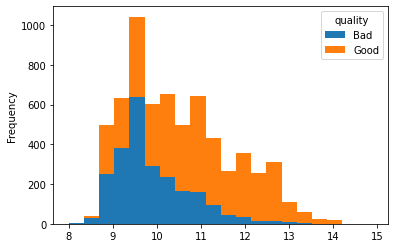

In [31]:
data.pivot(columns="quality")["alcohol"].plot.hist(bins=20, stacked=True);

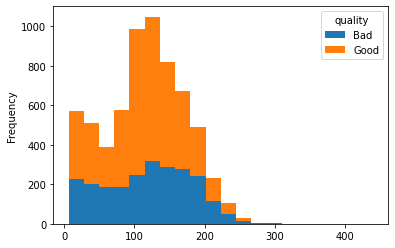

In [32]:
data.pivot(columns="quality")["total sulfur dioxide"].plot.hist(bins=20, stacked=True);

- In enologia, l'anidride solforosa è utilizzata sin dalle primissime fasi della produzione del vino, a partire dal mosto fino all'imbottigliamento. Nell'usare l'anidride solforosa, è opportuno sapere che una parte di questo gas si combina con alcuni componenti del mosto o del vino, mentre la restante parte resta libera, cioè non combinata. Sarà proprio la parte libera a svolgere gli importanti effetti antiossidanti e antisettici: per questo motivo è indispensabile che l'anidride solforosa si combini il meno possibile. L'anidride solforosa combinata è comunque utile, poiché nel caso in cui la frazione libera si disperda - durante le operazioni di travaso, per esempio - una piccola parte di quella combinata si libera sostituendola. (fonte: https://www.agraria.org/viticoltura-enologia/anidride-solforosa.htm).

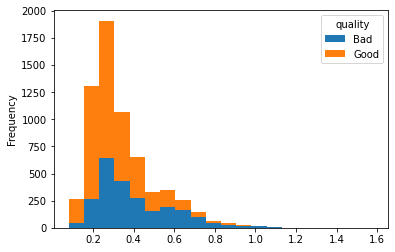

In [33]:
data.pivot(columns="quality")["volatile acidity"].plot.hist(bins=20, stacked=True);

- Si definisce acidità volatile in un vino, la quantità di acido acetico presente in un vino e viene espressa in g/l di acido acetico. E’ importante determinare l’acidità volatile del vino perché la quantità di acido acetico presente è indice dello stato di sanità dell’uva, di come procede la fermentazione e poi, in generale, dello stato di conservazione del vino. (fonte: https://www.rivistadiagraria.org/articoli/anno-2009/determinazione-dellacidita-volatile-di-un-vino/)

- Possiamo visualizzare i valori medi di tutte le feature, distinti per qualità, raggruppandoli per quest'ultimo.

In [34]:
data_by_quality = data.groupby("quality")
data_by_quality.mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
Bad,7.337828,0.396995,0.304624,5.662828,0.064388,29.426669,119.237320,2.012600,3.214167,0.524539,9.872244
Good,7.153522,0.305831,0.327189,5.323012,0.051232,31.119907,113.702995,1.545696,3.221323,0.535150,10.847958


- Per valutare visivamente la correlazione tra due variabili, possiamo selezionarne alcune ed evidenziare anche le due diverse classi nel *diagramma a dispersione*, differenziando i punti ad esempio per colore mediante un dizionario che associ green ai vini buoni e rosso ai vini cattivi.

In [35]:
quality_color_map = {"Good": "green", "Bad": "red"}
quality_colors = data["quality"].map(quality_color_map)

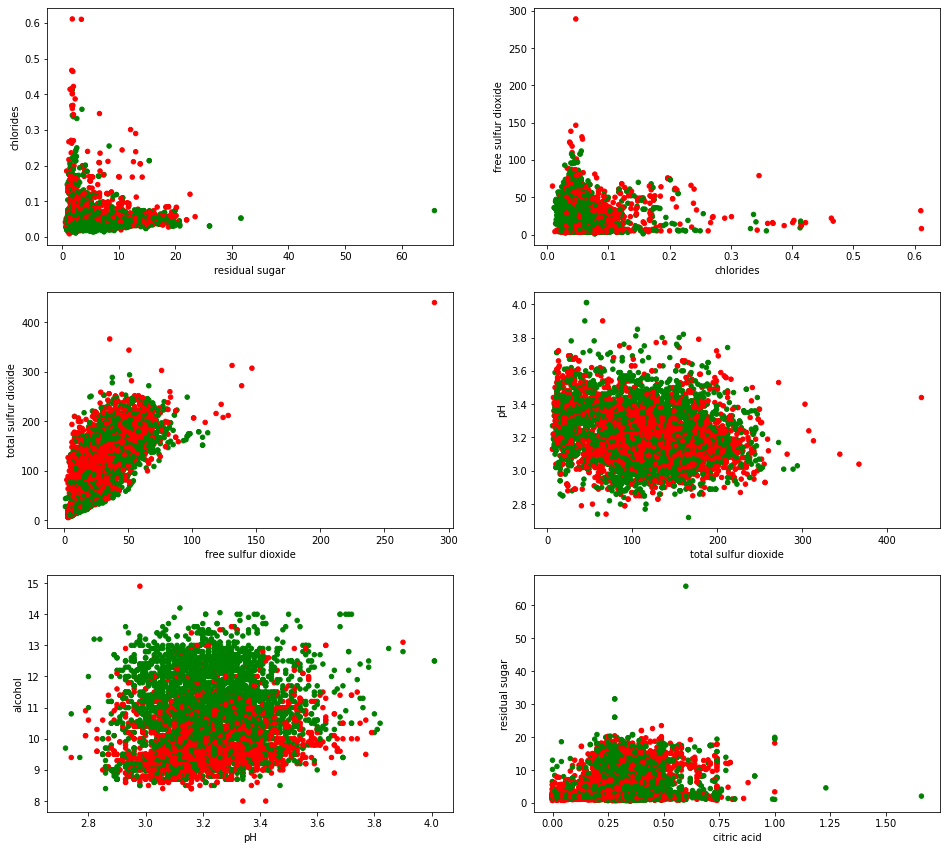

In [36]:
plt.figure(figsize=(16, 20))
data.plot.scatter(ax=plt.subplot(4,2,1), x="residual sugar", y="chlorides", c=quality_colors);
data.plot.scatter(ax=plt.subplot(4,2,2), x="chlorides", y="free sulfur dioxide", c=quality_colors);
data.plot.scatter(ax=plt.subplot(4,2,3), x="free sulfur dioxide", y="total sulfur dioxide", c=quality_colors);
data.plot.scatter(ax=plt.subplot(4,2,4), x="total sulfur dioxide", y="pH", c=quality_colors);
data.plot.scatter(ax=plt.subplot(4,2,5), x="pH", y="alcohol", c=quality_colors);
data.plot.scatter(ax=plt.subplot(4,2,6), x="citric acid", y="residual sugar", c=quality_colors);

In [37]:
chlorides = data["chlorides"]
residual_sugar = data["residual sugar"]
free_sulfur_dioxide = data["free sulfur dioxide"]
total_sulfur_dioxide = data["total sulfur dioxide"]
citric_acid = data["citric acid"]

- Negli terzo grafico notiamo che c'è una dipendenza fra le variabili. A conferma, calcoliamo il *coefficiente di correlazione di Pearson*.

In [38]:
np.mean((free_sulfur_dioxide-free_sulfur_dioxide.mean()) * (total_sulfur_dioxide-total_sulfur_dioxide.mean())) / (free_sulfur_dioxide.std() * total_sulfur_dioxide.std())

0.7206203265321006

- Il valore del coefficiente di Pearson è vicino a 1 (correlazione diretta): al raddoppiare di una, raddoppia anche l'altra.

- Mentre le altre variabili sono scorrelate tra loro, questo è deducibile visivamente guardando i grafi. Per dimostrarlo, calcoliamo alcuni coefficenti di Pearson di queste variabili.

In [39]:
np.mean((chlorides-chlorides.mean()) * (residual_sugar-residual_sugar.mean())) / (chlorides.std() * residual_sugar.std()) 

-0.12874650976121177

In [40]:
np.mean((free_sulfur_dioxide-free_sulfur_dioxide.mean()) * (chlorides-chlorides.mean())) / (free_sulfur_dioxide.std() * free_sulfur_dioxide.std())

-0.0003861868765156005

In [41]:
np.mean((citric_acid-citric_acid.mean()) * (residual_sugar-residual_sugar.mean())) / (citric_acid.std() * residual_sugar.std()) 

0.140664719333444

#Normalizzazione dei dati

Procediamo ora con la normalizzazione/standardizzazione delle variabili.

In generale le variabili coinvolte in un modello di regressione
possono utilizzare scale di valori molto diverse. Questo rende difficile l'interpretazione dei modelli che andremo ad addestrare. Una soluzione più semplice è però normalizzare i dati in modo che tutte le variabili abbiano valori in un medesimo intervallo.

- Nel nostro caso abbiamo necessità di normalizzare i dati come si nota dall'esempio sotto.

In [42]:
data[["total sulfur dioxide", "chlorides"]]

,total sulfur dioxide,chlorides
0,170.0,0.045
1,132.0,0.049
2,97.0,0.050
3,186.0,0.058
4,186.0,0.058
...,...,...
6435,44.0,0.090
6436,51.0,0.062
6437,40.0,0.076
6438,44.0,0.075


- Effettueremo la standardizzazione dopo aver applicato il metodo *Hold-Out* per suddividere i dati in training e validation set in preparazione all'addestramento dei modelli.

- Prima però proviamo ad addestrare un modello d'esempio senza standardizzare le feature.

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

In [44]:
y = data["quality"] #variabile da predire
X = data.drop(columns=['quality']) #variabili predittive

- Applichiamo il metodo *Hold-Out* per partizionare casualmente i dati, riservandone i 2/3 al training set e il restante al validation set. Per partizionare definiremo il parametro *random_state* (ovvero un seed per generare divisioni casuali del set) pari a 42, un numero convenzionale.

- Evitiamo per ora di utilizzare una *pipeline*, per analizzare più agevolmente il modello.

In [45]:
X_train, X_val, y_train, y_val = \
    train_test_split(X, y, test_size=1/3, random_state=42) 

- Addestriamo un modello **Perceptron** d'esempio.

In [46]:
model = Perceptron(random_state=42) 
model.fit(X_train, y_train)
model.score(X_val, y_val)

0.37168141592920356

- Il nostro modello, che utilizza variabili non standardizzate, produce scarsi risultati con un tasso di accuratezza che arriva a 37,1%. Ciò accade perchè le variabili presenti presentano ordini di grandezza troppo distanti.

- Proviamo adesso a **standardizzare** le feature e vedere come ciò influisca sui nostri risultati:

In [47]:
scaler = StandardScaler()
Xn_train = scaler.fit_transform(X_train)
Xn_val = scaler.transform(X_val)

- Addestriamo nuovamente un modello **Perceptron**.

In [48]:
model = Perceptron(random_state=42) 
model.fit(Xn_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=42, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

- Una volta addestrato il modello, possiamo trovare i valori dei pesi $\mathbf{w}$ e del bias $b$ rispettivamente negli attributi `coef_[0]` e `intercept_[0]`

In [49]:
model.coef_[0]

array([-0.7449126 , -5.8152028 ,  0.65983655, -0.48625372, -0.79358904,
       -1.19850852, -5.12391046, 10.39449931,  0.55725218, -0.28148044,
        5.69664999])

- Possiamo anche capire meglio quale variabile abbia piú peso rispetto ad un'altra.

In [50]:
pd.Series(model.coef_[0], index=X_train.columns)

fixed acidity           -0.744913
volatile acidity        -5.815203
citric acid              0.659837
residual sugar          -0.486254
chlorides               -0.793589
free sulfur dioxide     -1.198509
total sulfur dioxide    -5.123910
density                 10.394499
pH                       0.557252
sulphates               -0.281480
alcohol                  5.696650
dtype: float64

In [51]:
model.intercept_[0]

4.0

- Valutiamo nuovamente la bontá del nostro modello:

In [52]:
model.score(Xn_val, y_val)

0.7009781089892874

- Dopo aver normalizzato le variabili, il nostro modello produce ottimi risultati con un accuratezza del 70%. Calcoliamo ora il numero di istanze corrette e quelle errate.

In [53]:
correct_class = model.predict(Xn_val) == y_val
correct_class.value_counts() 

True     1505
False     642
Name: quality, dtype: int64

- Il numero di istanze che il nostro modello interpreta correttamente é di 1505 contro le 642 errate. 

#Regolarizzazione dei dati ed indagine delle feature piú rilveanti

Per individuare le feature meno importanti utilizziamo la regolarizzazione **LASSO o L1** per poi andarle eventualmente ad eliminarle. 

In [54]:
model_l1 = Perceptron(penalty='l1', alpha=0.0001, random_state=42)
model_l1.fit(Xn_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty='l1', random_state=42, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [55]:
pd.Series(model_l1.coef_[0], index=X_train.columns)

fixed acidity           0.000000
volatile acidity       -1.651256
citric acid            -2.468118
residual sugar          0.000000
chlorides              -1.990048
free sulfur dioxide     0.209809
total sulfur dioxide    0.000000
density                 1.658920
pH                      0.390793
sulphates               4.014747
alcohol                 2.593822
dtype: float64

In [56]:
model_l1.score(Xn_val, y_val) 

0.6432231020027946

- Come si puó notare dalla cella qui sopra, applicando una regolarizzazione LASSO il modello perde precisione. Come ulteriore dimostrazione creiamo un modello Princeptron utilizzando peró solo le feature non annullate.

In [57]:
X = data[["volatile acidity", "citric acid", "chlorides", "free sulfur dioxide", "density", "pH", "sulphates", "alcohol"]]

In [58]:
X8_train, X8_val, y8_train, y8_val = \
    train_test_split(X, y, test_size=1/3, random_state=42)

In [59]:
scaler = StandardScaler()
X8n_train = scaler.fit_transform(X8_train)
X8n_val = scaler.transform(X8_val)

In [60]:
model_8f = Perceptron(random_state=42) 
model_8f.fit(X8n_train, y8_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=42, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [61]:
model_8f.score(X8n_val, y8_val) 

0.6567303213786679

- E' evidente quindi che per i nostri scopi andranno considerate tutte le feature. Sará comunque importante apportare una regolarizzazione a tutte le nostre feature.

Applichiamo ora la regolarizzazione **RIDGE O L2** al nostro modello d'esempio. 

In [62]:
model_l2 = Perceptron(penalty='l2', alpha=0.0001, random_state=42)
model_l2.fit(Xn_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty='l2', random_state=42, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [63]:
pd.Series(model_l2.coef_[0], index=X_train.columns)

fixed acidity          -1.366241
volatile acidity       -6.890525
citric acid            -0.418526
residual sugar         -0.048471
chlorides               0.387659
free sulfur dioxide     0.478951
total sulfur dioxide   -3.389469
density                 7.790380
pH                      1.744357
sulphates               1.336448
alcohol                 3.310862
dtype: float64

In [64]:
model_l2.score(Xn_val, y_val) 

0.7219375873311598

- Come si vede, diminuendo il peso delle feature lo score, ovvero l'accuratezza, del modello aumenta. 

- E' peró risaputo che la suddivisone di istanze tra classi sbilanciate porti a molti errori di classificazione e quindi alla generazione di un modello inadeguato: il nostro dataset soffre di questo problema. Bisogna quindi sottolineare l'inaffidabilitá degli score di accuratezza ottenuti fin'ora.

- La matrice di confusione sottostante conferma quanto appena descritto: di 1379 vini buoni presenti nel validation set solo 815 sono state etichettate correttamente. 

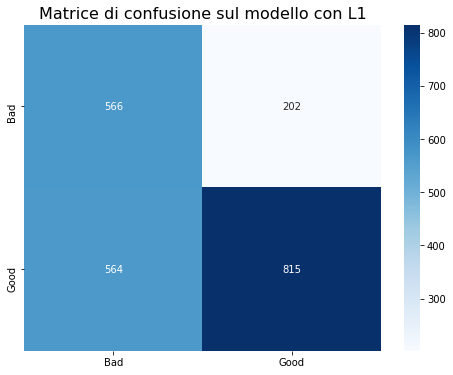

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(8, 6))
plt.title('Matrice di confusione sul modello con L1', size=16)
sns.heatmap(pd.DataFrame(confusion_matrix(y_val, model_l1.predict(Xn_val)), columns=model_l1.classes_, index = model_l1.classes_), annot=True, cmap='Blues', fmt='d');



#Generazione di modelli di learning

##Risoluzione problema classi sbilanciate

Come dimostrato nella fase precedente c'é un forte sbilanciamento delle classi.
E' necessario quindi attuare un meccanismo di **oversampling**, ovvero aumentare il numero delle istanze nella classe meno rappresentata. Come spiegato a lezione, si utilizzerà la tecnica **SMOTE** o **Synthetic Minority Oversampling Technique** che fa parte del modulo imblearn.

- Procediamo quindi a fare l'oversampling del training set e del validation set. Come da documentazione si userà il metodo *fit_resample(X,y)*.

In [66]:
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

sm = SMOTE(random_state=42)

X_bal, y_bal = sm.fit_resample(X, y)
X_bal = pd.DataFrame(X_bal, columns=X.columns)
y_bal = pd.Series(y_bal, dtype="category", name="quality")

X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)
X_train_bal = pd.DataFrame(X_train_bal, columns=X_train.columns)
y_train_bal = pd.Series(y_train_bal, dtype="category", name="quality")

Prima del resampling:

In [67]:
pd.Series(y_train).value_counts()

Good    2695
Bad     1598
Name: quality, dtype: int64

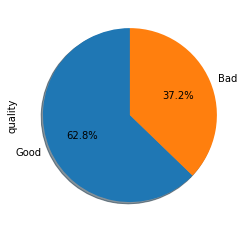

In [68]:
pd.Series(y_train).value_counts().plot.pie(autopct='%1.1f%%',
        shadow=True, startangle=90);

Dopo il resampling:

In [69]:
y_train_bal.value_counts()

Good    2695
Bad     2695
Name: quality, dtype: int64

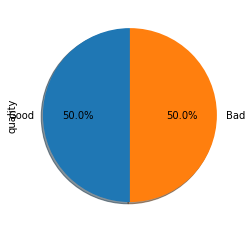

In [70]:
y_train_bal.value_counts().plot.pie(autopct='%1.1f%%',
        shadow=True, startangle=90);

- Le classi sono ora bilanciate.

- Creiamo prima dei dizionari per salvarci alcuni dati sui modelli che andremo a creare:

In [71]:
scores = {}
recall = {}
precision = {}
f1 = {}
models = {}
confusion_matrices = {}

## Perceptron

La fase di modellazione ha inizio provando un modello basato su Perceptron. Il _Perceptron_ è un algoritmo di apprendimento molto semplice, concettualmente simile alla discesa gradiente. Per trovare i migliori parametri possibili usiamo _GridSearch_: la grid search testerá tutte le combinazioni di iperparametri possibili. Per questo modello Perceptron cerchiamo di ottenere il massimo rendimento possibile dai seguenti iperparametri:
- standardizzazione o meno delle feature
- tipo di regolarizzazione del modello
- peso della regolarizzazione
- stima o meno dell'intercetta

In [72]:
from sklearn.model_selection import KFold
kf = KFold(5, shuffle=True, random_state=42)

In [73]:
per_mod = Pipeline([
    ("scaler", StandardScaler()),
    ("per", Perceptron(n_jobs=-1, random_state=42)) #n_jobs=-1 per utilizzare tutti i processori
])

#In generale, tutti i parametri disponibili per l'ottimizzazione in GridSearchCV sono disponibili tramite
#per_mod.get_params().keys()

#ATTENZIONE! Nel dizionario per_grid (per cercare la migliore ottimizzazione 
#dei vari parametri) la chiave di ogni possibile valore del parametro dovrá essere
#esattamente la stessa contenuta in per_mod.get_params().keys()

per_grid = {
    "scaler": [None, StandardScaler()],
    "per__penalty": ["l2", "l1", "elasticnet"],
    "per__alpha": [0.0001, 0.001, 0.01, 1, 10],
    "per__fit_intercept": [False, True]
}

In [74]:
from sklearn.model_selection import GridSearchCV

#se voglio dentro cv_results_ i training score --> return_train_score=True 
per_gs = GridSearchCV(estimator=per_mod, param_grid=per_grid, cv=kf, n_jobs=-1)

In [75]:
per_gs.fit(X_train_bal, y_train_bal)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('per',
                                        Perceptron(alpha=0.0001,
                                                   class_weight=None,
                                                   early_stopping=False,
                                                   eta0=1.0, fit_intercept=True,
                                                   max_iter=1000,
                                                   n_iter_no_change=5,
                                                   n_jobs=-1, penalty=None,
                                                   

In [77]:
print('CV score: {:.5f}'.format(per_gs.score(X_val, y_val)))
print('\n')
print('Best parameter:',per_gs.best_params_)
print('\n')
print('Best estimator:',per_gs.best_estimator_)


CV score: 0.64043


Best parameter: {'per__alpha': 0.0001, 'per__fit_intercept': True, 'per__penalty': 'l1', 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


Best estimator: Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('per',
                 Perceptron(alpha=0.0001, class_weight=None,
                            early_stopping=False, eta0=1.0, fit_intercept=True,
                            max_iter=1000, n_iter_no_change=5, n_jobs=-1,
                            penalty='l1', random_state=42, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False))],
         verbose=False)


Oltre all'accuratezza come percentuale di classificazioni corrette, é importante tenere conto anche di altri parametri che indicano quanto il nostro modello sia preciso.

Oltre alla matrice di confusione vista prima ora utilizzeremo come metro di giudizio per la precisione del modello anche:
- F1 Score, misura unica della performance di un modello è la **_F1-measure_**, ovvero la media armonica tra precision e recall.
- Precision Score, la **_precision_** indica la percentuale di esempi classificati come "Good" che sono realmente tali.
- Recall score, la **_recall_** indica la percentuale di esempi realmente di classe "Bad" che sono stati rilevati essere tali dal modello.

F1 score: 0.71086


Precision score: 0.73509


Recall score: 0.68818




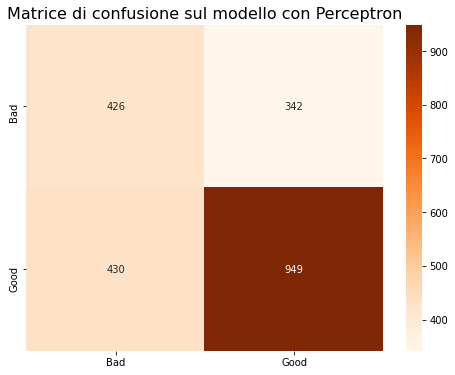

In [78]:
from sklearn.metrics import precision_score, recall_score, f1_score

#col parametro average si indica se si vuole la media(macro) o un vettore (None) o altro
#col parametro pos_label si indica la classe di riferimento

print('F1 score: {:.5f}'.format(f1_score(y_val, per_gs.predict(X_val), pos_label='Good')))
print('\n')
print('Precision score: {:.5f}'.format(precision_score(y_val, per_gs.predict(X_val), pos_label='Good')))
print('\n')
print('Recall score: {:.5f}'.format(recall_score(y_val, per_gs.predict(X_val), pos_label='Good')))
print('\n')
plt.figure(figsize=(8, 6))
plt.title('Matrice di confusione sul modello con Perceptron', size=16)
sns.heatmap(pd.DataFrame(confusion_matrix(y_val, per_gs.predict(X_val)), columns=per_gs.classes_, index = per_gs.classes_), 
            annot=True, cmap='Oranges', fmt='d');



Salviamo le informazioni nei vari dizionari, che più tardi ci serviranno.

In [79]:
scores["per"] = per_gs.score(X_val, y_val)
recall["per"] = recall_score(y_val, per_gs.predict(X_val), pos_label='Good')
precision["per"] = precision_score(y_val, per_gs.predict(X_val), pos_label='Good')
f1["per"] = f1_score(y_val, per_gs.predict(X_val), pos_label='Good')
models["per"] = per_gs.best_estimator_
confusion_matrices["per"] = pd.DataFrame(confusion_matrix(y_val, per_gs.predict(X_val)), columns=per_gs.classes_, index = per_gs.classes_)

Dalla matrice di confusione e dagli score si puó notare come il modello appare ancora piuttosto sbilanciato e leggermente preciso.

Testiamo ora un modello basato sulla **Regressione Logistica**.

## Regressione Logistica

La fase di modellazione prosegue testando un modello basato sulla Regresione Logistica. La  _Regressione Logistica_ è un  un modello di classificazione binaria basato sulla regressione lineare. Per trovare i migliori parametri possibili usiamo nuovamente _GridSearch_.


Per questo modello cerchiamo i seguenti migliori iperparametri in due casi:\
*Il primo, con regolarizzazione L2 e L1 senza specificare l1_ratio:*
- standardizzazione o meno delle feature
- tipo di regolarizzazione del modello
- peso della regolarizzazione
- stima o meno dell'intercetta

*Il secondo, con elasticnet specificando i valori possibili di l1_ratio:*
- standardizzazione o meno delle feature
- tipo di regolarizzazione del modello
- peso della regolarizzazione
- peso l1_ratio
- stima o meno dell'intercetta

P.S: in Python il secondo iperparametro che la Regressione Elastic Net introduce (&alpha;) si identifica con _l1_ratio_

In [80]:
from sklearn.linear_model import LogisticRegression
#random_state indica il seed per la casualità usato nell'addestramento
#solver indica quale implementazione utilizzare tra per l'addestramento, "saga" 
#è l'unica che supporta tutte le opzioni per la regolarizzazione

log_mod = Pipeline([
    ("scaler", StandardScaler()),
    ("log", LogisticRegression(solver='saga', random_state=42))
])

#np.logspace come in matlab, estremi e poi numero di passi tra gli estremi
log_grid = [
    {
        "scaler": [None, StandardScaler()],
        "log__penalty": ["l2", "l1"],
        "log__C": np.logspace(-3, 3, num=10),
        "log__fit_intercept": [False, True]
    },
    {
        "scaler": [None, StandardScaler()],
        "log__penalty": ["elasticnet"],
        "log__C": np.logspace(-3, 3, num=10),
        "log__l1_ratio": np.logspace(0,1,num=10),
        "log__fit_intercept": [False, True]
    }
]

In [81]:
log_gs = GridSearchCV(estimator=log_mod,param_grid=log_grid, cv=kf, n_jobs=-1)

In [83]:
log_gs.fit(X_train_bal, y_train_bal)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10.3 µs


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('log',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                

In [84]:
print('CV score: {:.5f}'.format(log_gs.score(X_val, y_val)))
print('\n')
print('Best parameter:',log_gs.best_params_)
print('\n')
print('Best estimator:',log_gs.best_estimator_)

CV score: 0.73871


Best parameter: {'log__C': 0.46415888336127775, 'log__fit_intercept': True, 'log__penalty': 'l1', 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


Best estimator: Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log',
                 LogisticRegression(C=0.46415888336127775, class_weight=None,
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='auto',
                                    n_jobs=None, penalty='l1', random_state=42,
                                    solver='saga', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)


F1 score: 0.78197


Precision score: 0.84255


Recall score: 0.72951




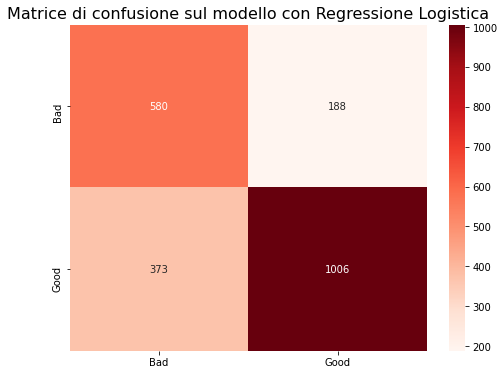

In [85]:
print('F1 score: {:.5f}'.format(f1_score(y_val, log_gs.predict(X_val), pos_label='Good')))
print('\n')
print('Precision score: {:.5f}'.format(precision_score(y_val, log_gs.predict(X_val), pos_label='Good')))
print('\n')
print('Recall score: {:.5f}'.format(recall_score(y_val, log_gs.predict(X_val), pos_label='Good')))
print('\n')
plt.figure(figsize=(8, 6))
plt.title('Matrice di confusione sul modello con Regressione Logistica', size=16)
sns.heatmap(pd.DataFrame(confusion_matrix(y_val, log_gs.predict(X_val)), columns=log_gs.classes_, index = log_gs.classes_), 
            annot=True, cmap='Reds', fmt='d');

In [86]:
scores["log"] = log_gs.score(X_val, y_val);
recall["log"] = recall_score(y_val, log_gs.predict(X_val), pos_label='Good')
precision["log"] = precision_score(y_val, log_gs.predict(X_val), pos_label='Good')
f1["log"] = f1_score(y_val, log_gs.predict(X_val), pos_label='Good')
models["log"] = log_gs.best_estimator_
confusion_matrices["log"] = pd.DataFrame(confusion_matrix(y_val, log_gs.predict(X_val)), columns=log_gs.classes_, index = log_gs.classes_)

Come si vede sopra il modello appena generato é piú preciso sotto tutti i punti di vista rispetto al classico Perceptron. Rimane peró leggermente alta la classificazione di falsi positivi. La modellazione prosegue con un modello di tipo **SVM** o **Support Vector Machines**.

## Support Vector Machines

Continuiamo i nostri test utilizzando ora un modello basato sul Support Vector Machines o SVM.  Il  _SVM o Support Vector Machines_ è un  un modello, definito in origine per problemi di classificazione binaria basato, con l'obiettivo di inviduare la separazione lineare ottimale tra le istanze delle due classi. Per trovare i migliori parametri possibili usiamo nuovamente _GridSearch_.


Per questo modello cerchiamo i seguenti migliori iperparametri in due casi:\
*Il primo, che utilizza la funzione Kernel Gaussiana RBF:*
- tipologia funzione Kernel
- peso delle classi
- peso della regolarizzazione
- peso del coefficente Kernel gamma (&gamma;)

*Il secondo, SVC lineare:*
- tipologia funzione Kernel
- peso delle classi
- peso della regolarizzazione

Nota: é stato tentato anche il caso con la Funzione Kernel Polinomiale ma con scarsi risultati ed eccessivi tempi di addestramento. A tal proposito non verrá riportato in questo documento. 

In [87]:
from sklearn.svm import SVC

svc_mod = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(random_state=42))
])

#svc_mod.get_params().keys()
#gamma si poteva impostare in maniera automatica con gamma='scale' quando si crea l'SVC

svc_grid =[ {
    "svc__kernel": ["rbf"],
    "svc__class_weight": [None, "balanced"],
    "svc__C": [0.01, 0.1, 1, 10,100],
    'svc__gamma': [0.01, 0.1, 1, 10,100]
}, {
    "svc__kernel": ["linear"],
    "svc__class_weight": [None, "balanced"],
    "svc__C": [0.01, 0.1, 1, 10,100],
}
]

In [88]:
svc_gs = GridSearchCV(estimator=svc_mod,param_grid=svc_grid, cv=kf, n_jobs=-1)

In [89]:
svc_gs.fit(X_train_bal, y_train_bal) 

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=...
                                verbose=False),
             iid='deprecate

In [90]:
print('CV score: {:.5f}'.format(svc_gs.score(X_val, y_val)))
print('\n')
print('Best parameter:',svc_gs.best_params_)
print('\n')
print('Best estimator:',svc_gs.best_estimator_)

CV score: 0.77736


Best parameter: {'svc__C': 100, 'svc__class_weight': None, 'svc__gamma': 1, 'svc__kernel': 'rbf'}


Best estimator: Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=100, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=1, kernel='rbf', max_iter=-1, probability=False,
                     random_state=42, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)


F1 score: 0.82580


Precision score: 0.83004


Recall score: 0.82161




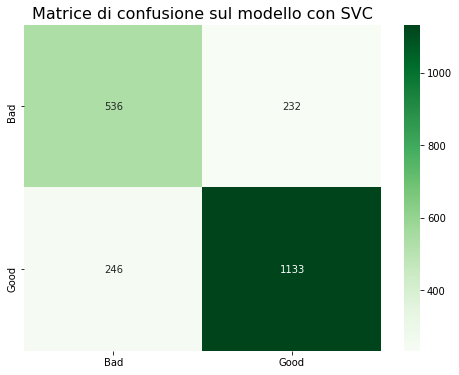

In [91]:
print('F1 score: {:.5f}'.format(f1_score(y_val, svc_gs.predict(X_val), pos_label='Good')))
print('\n')
print('Precision score: {:.5f}'.format(precision_score(y_val, svc_gs.predict(X_val), pos_label='Good')))
print('\n')
print('Recall score: {:.5f}'.format(recall_score(y_val, svc_gs.predict(X_val), pos_label='Good')))
print('\n')
plt.figure(figsize=(8, 6))
plt.title('Matrice di confusione sul modello con SVC', size=16)
sns.heatmap(pd.DataFrame(confusion_matrix(y_val, svc_gs.predict(X_val)), columns=svc_gs.classes_, index = svc_gs.classes_), 
            annot=True, cmap='Greens', fmt='d');

In [92]:
scores["svc"] = svc_gs.score(X_val, y_val);
recall["svc"] = recall_score(y_val, svc_gs.predict(X_val), pos_label='Good')
precision["svc"] = precision_score(y_val, svc_gs.predict(X_val), pos_label='Good')
f1["svc"] = f1_score(y_val, svc_gs.predict(X_val), pos_label='Good')
models["svc"] = svc_gs.best_estimator_
confusion_matrices["svc"] = pd.DataFrame(confusion_matrix(y_val, svc_gs.predict(X_val)), columns=svc_gs.classes_, index = svc_gs.classes_)

## Albero Decisionale

Il prossimo modello che vedremo é generato attraverso un Albero Decisionale o Decision Tree. I modelli di classificazione visti finora si basano su iperpiani descritti da equazioni (lineari o non) su tutte le variabili. L' **Albero Decisionale** o **Decision Tree** costituisce un approccio differente: la classificazione avviene in base ad una serie di decisioni "semplici", basate ciascuna su una sola variabile. L'obiettivo é quindi:
- creare una struttura ad albero dove ogni nodo intermedio contiene un predicato con una variabile di input
- il predicato divide le istanze di input in 2 sottoinsiemi a cui corrispondono 2 nodi figli con relativi sotto alberi e così via ricorsivamente

In [93]:
from sklearn.tree import DecisionTreeClassifier

features_num = X.columns.size

tree_mod = Pipeline([
    ("scaler", StandardScaler()),
    ("tree", DecisionTreeClassifier(class_weight="balanced", random_state=42))
])

#print(tree_mod.get_params().keys())

tree_grid = {'scaler': [None, StandardScaler()],
             'tree__min_samples_split': range(2, 6),
             'tree__min_samples_leaf': range(1, 6), 
             'tree__max_depth': range(2,6),
             'tree__max_features': range(2, features_num)}

In [94]:
tree_gs = GridSearchCV(estimator=tree_mod,param_grid=tree_grid, cv=kf, n_jobs=-1)

In [95]:
tree_gs.fit(X_train_bal, y_train_bal) 

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('tree',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight='balanced',
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                            

In [ ]:
print('CV score: {:.5f}'.format(tree_gs.score(X_val, y_val)))
print('\n')
print('Best parameter:',tree_gs.best_params_)
print('\n')
print('Best estimator:',tree_gs.best_estimator_)

CV score: 0.73405


Best parameter: {'scaler': None, 'tree__max_depth': 5, 'tree__max_features': 7, 'tree__min_samples_leaf': 1, 'tree__min_samples_split': 2}


Best estimator: Pipeline(memory=None,
         steps=[('scaler', None),
                ('tree',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                                        criterion='gini', max_depth=5,
                                        max_features=7, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=42,
                                        splitter='best'))],
         verbose=False)


F1 score: 0.78131


Precision score: 0.82792


Recall score: 0.73967




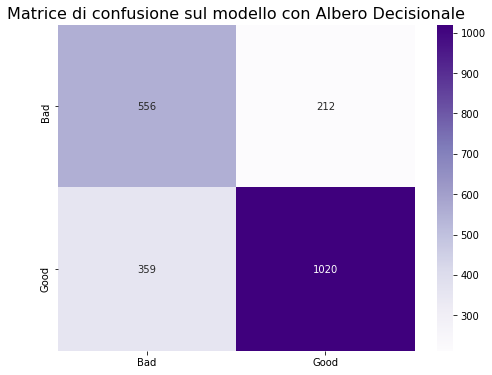

In [ ]:
print('F1 score: {:.5f}'.format(f1_score(y_val, tree_gs.predict(X_val), pos_label='Good')))
print('\n')
print('Precision score: {:.5f}'.format(precision_score(y_val, tree_gs.predict(X_val), pos_label='Good')))
print('\n')
print('Recall score: {:.5f}'.format(recall_score(y_val, tree_gs.predict(X_val), pos_label='Good')))
print('\n')
plt.figure(figsize=(8, 6))
plt.title('Matrice di confusione sul modello con Albero Decisionale', size=16)
sns.heatmap(pd.DataFrame(confusion_matrix(y_val, tree_gs.predict(X_val)), columns=tree_gs.classes_, index = tree_gs.classes_), 
            annot=True, cmap='Purples', fmt='d');

Per visualizzare maggiormente il modello possiamo stampare _testualmente_ e _graficamente_ il tutto. Per una maggior comprensione la profonditá é stata limitata a 2.

|--- alcohol <= 10.79
|   |--- volatile acidity <= 0.24
|   |   |--- volatile acidity <= 0.20
|   |   |   |--- free sulfur dioxide <= 13.50
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- free sulfur dioxide >  13.50
|   |   |   |   |--- truncated branch of depth 2
|   |   |--- volatile acidity >  0.20
|   |   |   |--- volatile acidity <= 0.22
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- volatile acidity >  0.22
|   |   |   |   |--- truncated branch of depth 2
|   |--- volatile acidity >  0.24
|   |   |--- volatile acidity <= 0.28
|   |   |   |--- chlorides <= 0.05
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- chlorides >  0.05
|   |   |   |   |--- truncated branch of depth 2
|   |   |--- volatile acidity >  0.28
|   |   |   |--- sulphates <= 0.54
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- sulphates >  0.54
|   |   |   |   |--- truncated branch of depth 2
|--- alcohol >  10.79
|   |--- alcohol <= 11.78
| 

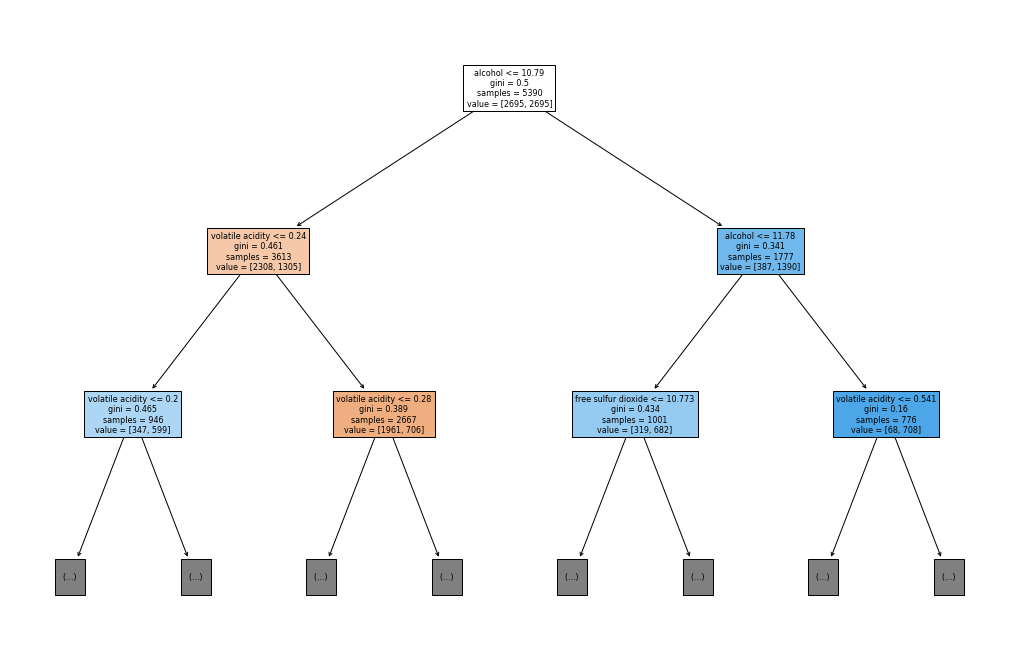

In [ ]:
from sklearn.tree import export_text, plot_tree
features_name = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
print(export_text(tree_gs.best_estimator_[1], feature_names=features_name, max_depth=3))


plt.figure(figsize=(18, 12))
plot_tree(tree_gs.best_estimator_[1], feature_names=features_name,  max_depth=2, filled=True);

La rappresentazione testuale mostra come il modello classifichi ciascuna richiesta: 
- se l'alcohol non é maggiore di 10,79 allora considera l'aciditá volatile
  - se non superiore a 0,20 allora considera il diossido di solfuro libero altrimenti ricontrolla l'aciditá volatile.
- E cosí via fino a quando non classifica la richiesta in una maniera o in un'altra.

In [ ]:
scores["tree"] = tree_gs.score(X_val, y_val);
recall["tree"] = recall_score(y_val, tree_gs.predict(X_val), pos_label='Good')
precision["tree"] = precision_score(y_val, tree_gs.predict(X_val), pos_label='Good')
f1["tree"] = f1_score(y_val, tree_gs.predict(X_val), pos_label='Good')
models["tree"] = tree_gs.best_estimator_
confusion_matrices["tree"] = pd.DataFrame(confusion_matrix(y_val, tree_gs.predict(X_val)), columns=tree_gs.classes_, index = tree_gs.classes_)

## Generazione Modelli Opzionali 

Per interesse personale sono stati generati alcuni modelli solamente accennati o brevemente studiati durante il corso di Data Intensive. Per tali ragioni non verrano presi in considerazione nella decisione per il miglior modello generato.

Alcune difficoltà incontrate nello sviluppo di questi modelli sono state superate informandoci anche online tra cui dalla seguente fonte https://machinelearningmastery.com/ .

### KNeighborsClassifier

*KNN* è un algoritmo di apprendimento automatico supervisionato che può essere utilizzato per risolvere problemi di classificazione e regressione. Il principio di KNN è che il valore o la classe di un dato è determinato dai dati attorno a questo valore.

L'algoritmo di previsione calcola la distanza dal punto sconosciuto x, a tutti i punti in input. I punti vengono quindi ordinati aumentando la distanza da x. La previsione viene effettuata prevedendo l'etichetta di maggioranza dai punti più vicini "K".

La scelta di una K influenzerà la classe a cui verrà assegnato un nuovo punto.

P.S: Il valore passato a knc_n_neighbors rappresenta il valore K.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knc_mod = Pipeline([
    ('scaler', StandardScaler()),
    ('knc', KNeighborsClassifier(n_jobs=-1))
])

knc_grid = {"scaler": [None, StandardScaler()],
            'knc__n_neighbors': range(1, 10, 1),
            'knc__weights': ['uniform', 'distance']}

knc_gs = GridSearchCV(estimator=knc_mod,param_grid=knc_grid, cv=kf, n_jobs=-1)

knc_gs.fit(X_train_bal, y_train_bal) 

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('knc',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=-1,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
 

In [ ]:
print('Best CV score: {:.5f}'.format(knc_gs.best_score_))
print('\n')
print('Best parameter:',knc_gs.best_params_)
print('\n')
print('Best estimator:',knc_gs.best_estimator_)

Best CV score: 0.82059


Best parameter: {'knc__n_neighbors': 6, 'knc__weights': 'distance', 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


Best estimator: Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('knc',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=-1, n_neighbors=6, p=2,
                                      weights='distance'))],
         verbose=False)


F1 score: 0.82927


Precision score: 0.85925


Recall score: 0.80131




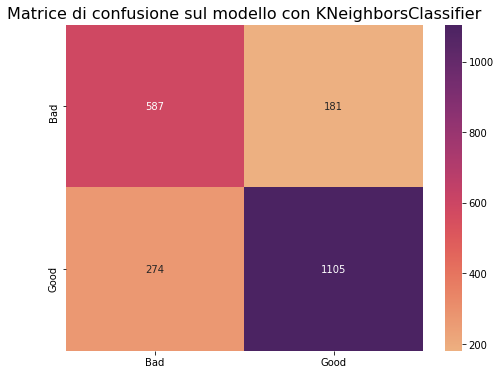

In [ ]:
print('F1 score: {:.5f}'.format(f1_score(y_val, knc_gs.predict(X_val), pos_label='Good')))
print('\n')
print('Precision score: {:.5f}'.format(precision_score(y_val, knc_gs.predict(X_val), pos_label='Good')))
print('\n')
print('Recall score: {:.5f}'.format(recall_score(y_val, knc_gs.predict(X_val), pos_label='Good')))
print('\n')
plt.figure(figsize=(8, 6))
plt.title('Matrice di confusione sul modello con KNeighborsClassifier', size=16)
sns.heatmap(pd.DataFrame(confusion_matrix(y_val, knc_gs.predict(X_val)), columns=knc_gs.classes_, index = knc_gs.classes_), 
            annot=True, cmap='flare', fmt='d');

### XGBoost

L’algoritmo *XGBoost*, acronimo di eXtreme Gradient Boosting, è un’implementazione specifica del metodo Gradient Boosting che utilizza approssimazioni più accurate per trovare il miglior modello ad albero. 

La formazione di un XGBoost è una procedura iterativa che calcola ad ogni passo la migliore suddivisione possibile per il k-esimo albero elencando tutte le possibili strutture ancora disponibili in quel punto del percorso. Per questo modello XGBoost cerchiamo di ottenere il massimo rendimento possibile dai seguenti iperparametri:
- xgb__eta o learning rate
- xgb__max_depth o numero massimo di nodi consentiti dalla radice alla foglia più lontana di un albero
- xgb__n_estimators o numero di alberi in un modello XGBoost
- xgb__alpha o il peso della regolarizzazione

In [ ]:
from xgboost import XGBClassifier

xgb_mod = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(n_jobs=8, random_state=42, objective='binary:logistic'))
])

xgb_grid = {
    'xgb__eta': [0.002, 0.1, 0.5],
    'xgb__max_depth': [6],
    'xgb__n_estimators': [150, 300],
    'xgb__alpha': [0.0001, 0.001]
}

xgb_gs = GridSearchCV(estimator=xgb_mod,param_grid=xgb_grid, cv=kf, n_jobs=-1)

xgb_gs.fit(X_train_bal, y_train_bal) 


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('xgb',
                                        XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_bytree=1,
                                                      gamma=0,
                                                      learning_rate=0.1,
                                                    

In [ ]:
print('Best CV score: {:.5f}'.format(xgb_gs.best_score_))
print('\n')
print('Best parameter:',xgb_gs.best_params_)
print('\n')
print('Best estimator:',xgb_gs.best_estimator_)

Best CV score: 0.83785


Best parameter: {'xgb__alpha': 0.0001, 'xgb__eta': 0.002, 'xgb__max_depth': 6, 'xgb__n_estimators': 300}


Best estimator: Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('xgb',
                 XGBClassifier(alpha=0.0001, base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eta=0.002, gamma=0,
                               learning_rate=0.1, max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=None,
                               n_estimators=300, n_jobs=8, nthread=None,
                               objective='binary:logistic', random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosit

F1 score: 0.83616


Precision score: 0.85124


Recall score: 0.82161




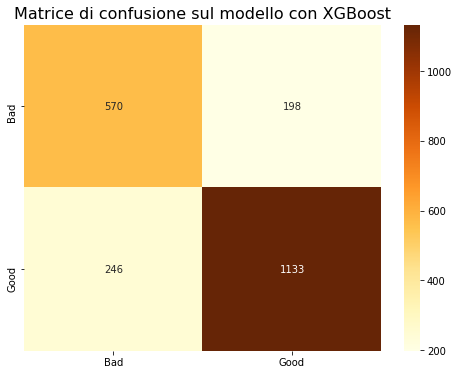

In [ ]:
print('F1 score: {:.5f}'.format(f1_score(y_val, xgb_gs.predict(X_val), pos_label='Good')))
print('\n')
print('Precision score: {:.5f}'.format(precision_score(y_val, xgb_gs.predict(X_val), pos_label='Good')))
print('\n')
print('Recall score: {:.5f}'.format(recall_score(y_val, xgb_gs.predict(X_val), pos_label='Good')))
print('\n')
plt.figure(figsize=(8, 6))
plt.title('Matrice di confusione sul modello con XGBoost', size=16)
sns.heatmap(pd.DataFrame(confusion_matrix(y_val, xgb_gs.predict(X_val)), columns=xgb_gs.classes_, index = xgb_gs.classes_), 
            annot=True, cmap='YlOrBr', fmt='d');

### Random Forest

Ogni modello utilizzato dalla previsione del *Random Forest* è un albero decisionale.

Una Random Forest combina molti alberi decisionali in un unico modello. Individualmente, le previsioni fatte dai singoli alberi decisionali potrebbero non essere accurate, ma combinate insieme, le previsioni saranno in media più vicine al risultato. Per questo modello Random Forest cerchiamo di ottenere il massimo rendimento possibile dai seguenti iperparametri:
- rf__n_estimators o numero di alberi in un modello Random Forest ovvero nella foresta
- rf__max_depth o numero massimo di nodi consentiti dalla radice alla foglia più lontana di un albero
- rf__min_samples_leaf o numero minimo di campioni richiesti per trovarsi in un nodo foglia.
- rf__min_samples_split o numero minimo di campioni richiesti per dividere un nodo interno

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_mod = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_jobs=-1, random_state=42))
])

rf_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [2, 4, 6, 8, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__min_samples_split': [2, 5, 10],
}

rf_gs = GridSearchCV(estimator=rf_mod,param_grid=rf_grid, cv=kf, n_jobs=-1)

rf_gs.fit(X_train_bal, y_train_bal) 

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('rf',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf

In [ ]:
print('Best CV score: {:.5f}'.format(rf_gs.best_score_))
print('\n')
print('Best parameter:',rf_gs.best_params_)
print('\n')
print('Best estimator:',rf_gs.best_estimator_)

Best CV score: 0.81391


Best parameter: {'rf__max_depth': 10, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}


Best estimator: Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rf',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=10, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=200, n_jobs=-1,
                                     

F1 score: 0.83194


Precision score: 0.87450


Recall score: 0.79333




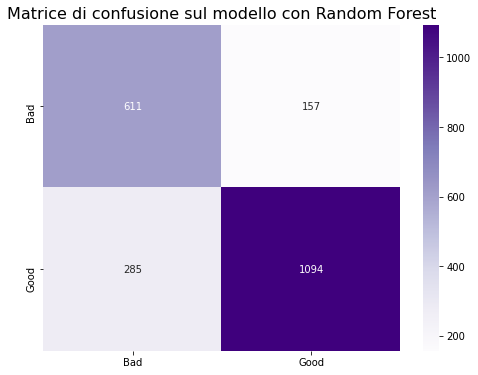

In [ ]:
print('F1 score: {:.5f}'.format(f1_score(y_val, rf_gs.predict(X_val), pos_label='Good')))
print('\n')
print('Precision score: {:.5f}'.format(precision_score(y_val, rf_gs.predict(X_val), pos_label='Good')))
print('\n')
print('Recall score: {:.5f}'.format(recall_score(y_val, rf_gs.predict(X_val), pos_label='Good')))
print('\n')
plt.figure(figsize=(8, 6))
plt.title('Matrice di confusione sul modello con Random Forest', size=16)
sns.heatmap(pd.DataFrame(confusion_matrix(y_val, rf_gs.predict(X_val)), columns=rf_gs.classes_, index = rf_gs.classes_), 
            annot=True, cmap='Purples', fmt='d');

### MLPClassifier

Lo scopo di un classificatore lineare è arrivare ad avere un iperpiano, determinato dalla combinazione lineare di $n$ variabili in input, in grado di dividere le istanze in classi. Se introducessimo delle variabili nascoste (hidden) in modo che l'iperpiano individuato dal modello sia combinazione lineare delle variabili nascoste e ciascuna nascosta sia combinazione lineare di quelle in input, allora otterremmo un *Multi Layer Perceptron* in quanto si tratta di piu modelli lineari disposti a strati. Per questo modello Multi Layer Perceptron cerchiamo di ottenere il massimo rendimento possibile dai seguenti iperparametri:
  - mlp__hidden_layer_sizes o numero di variabili nascoste da introdurre
  - mlp__batch_size o batch size (dimensione del lotto) cioè il numero di istanze che prenderà ad ogni iterazione dell'addestramento

In [ ]:
from sklearn.neural_network import MLPClassifier
MLP_mod = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPClassifier(random_state=42, activation="relu"))
])

MLP_grid = {
    "mlp__hidden_layer_sizes": [16, 32, (16, 8)],
    "mlp__batch_size": [100, 200]
}

MLP_gs = GridSearchCV(estimator=MLP_mod,param_grid=MLP_grid, cv=kf, n_jobs=-1)

MLP_gs.fit(X_train_bal, y_train_bal) 

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('mlp',
                                        MLPClassifier(activation='relu',
                                                      alpha=0.0001,
                                                      batch_size='auto',
                                                      beta_1=0.9, beta_2=0.999,
                                                      early_stopping=False,
                                                      epsilon=1e-08,
                                                      hidden_layer_sizes=(100,),
                                 

In [ ]:
print('Best CV score: {:.5f}'.format(MLP_gs.best_score_))
print('\n')
print('Best parameter:',MLP_gs.best_params_)
print('\n')
print('Best estimator:',MLP_gs.best_estimator_)

Best CV score: 0.77551


Best parameter: {'mlp__batch_size': 100, 'mlp__hidden_layer_sizes': 32}


Best estimator: Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlp',
                 MLPClassifier(activation='relu', alpha=0.0001, batch_size=100,
                               beta_1=0.9, beta_2=0.999, early_stopping=False,
                               epsilon=1e-08, hidden_layer_sizes=32,
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=200, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=42, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, warm_start=False))],
         verbose=F

F1 score: 0.80123


Precision score: 0.85086


Recall score: 0.75707




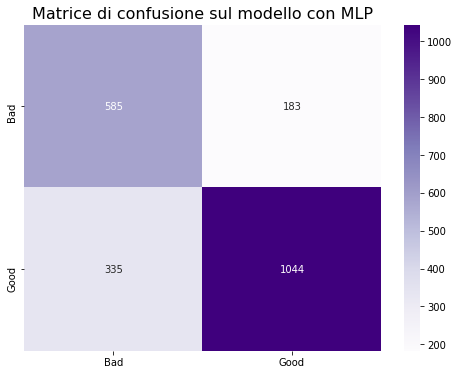

In [ ]:
print('F1 score: {:.5f}'.format(f1_score(y_val, MLP_gs.predict(X_val), pos_label='Good')))
print('\n')
print('Precision score: {:.5f}'.format(precision_score(y_val, MLP_gs.predict(X_val), pos_label='Good')))
print('\n')
print('Recall score: {:.5f}'.format(recall_score(y_val, MLP_gs.predict(X_val), pos_label='Good')))
print('\n')
plt.figure(figsize=(8, 6))
plt.title('Matrice di confusione sul modello con MLP', size=16)
sns.heatmap(pd.DataFrame(confusion_matrix(y_val, MLP_gs.predict(X_val)), columns=MLP_gs.classes_, index = MLP_gs.classes_), 
            annot=True, cmap='Purples', fmt='d');

# Valutazione modelli generati

## Valutazione modelli attraverso metriche standard

Iniziamo ora a valutare i modelli fin'ora generati sulla base di alcuni informazioni estrapolate da essi. 

La prima metrica che utilizzeremo per confrontare la bontà dei modelli è lo **scarto quadratico medio dell'errore dei relativi iperparametri trovati con la GridSearch**: esso corrisponde alla media dei quadrati delle differenze tra ciascun valore reale e la corrispondente predizione.

In [ ]:
from sklearn.model_selection import cross_val_score

name_model = {
    'per': 'Perceptron',
    'log': 'LogisticRegression',
    'svc': 'Support Vector Machines',
    'tree': 'Decision Tree'
}

for model in models.values():
  print(name_model[list(model.named_steps.keys())[1]] +
        ": %0.6f di accuratezza con deviazione standard di %0.6f" % 
        (cross_val_score(models[list(model.named_steps.keys())[1]],X_val, y_val,cv=kf).mean(), 
         cross_val_score(models[list(model.named_steps.keys())[1]],X_val, y_val,cv=kf).std()))
  print('\n')


Perceptron: 0.659999 di accuratezza con deviazione standard di 0.018110


LogisticRegression: 0.747550 di accuratezza con deviazione standard di 0.021540


Support Vector Machines: 0.743824 di accuratezza con deviazione standard di 0.012071


Decision Tree: 0.719159 di accuratezza con deviazione standard di 0.020535




Come possiamo notare in tutti i metodi i valori degli score sono molto vicini alla media (deviazioni standard piccole).

Confrontiamo i valori  di altri modi per valutare l'accuratezza di un classificatore: 
- **(R$^2$) Score**
- **Recall**
- **Precision**
- **F1 Score**

In [ ]:
pd.DataFrame.from_dict(scores, orient="index", columns=["(R^2) Score"])

,(R^2) Score
per,0.640429
log,0.738705
rand,0.487657
svc,0.777364
tree,0.734048


In [ ]:
pd.DataFrame.from_dict(recall, orient="index", columns=["Recall"])

,Recall
per,0.688180
log,0.729514
rand,0.483684
svc,0.821610
tree,0.739666


In [ ]:
pd.DataFrame.from_dict(precision, orient="index", columns=["Precision"])

,Precision
per,0.735089
log,0.842546
rand,0.632227
svc,0.830037
tree,0.827922


In [ ]:
pd.DataFrame.from_dict(f1, orient="index", columns=["F1 Score"])

,F1 Score
per,0.710861
log,0.781967
rand,0.548069
svc,0.825802
tree,0.781310


Dai risultati emerge come tutti i modelli generati diano buoni risultati, riuscendo a classificare correttamente la maggior parte delle istanze. In particolare è chiaro come il modello basato sul SVM sia il migliore (seguito dal Decision Tree) mentre quello istanziato attraverso Perceptron sia il peggiore: ragionevole in quanto il Perceptron è l'algoritmo più semplice e vecchio tra questi testati. 

A conferma di quanto appena detto osserviamo le matrici di confusione di questi:

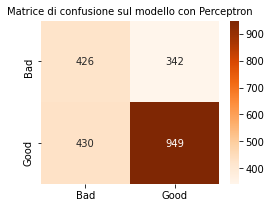

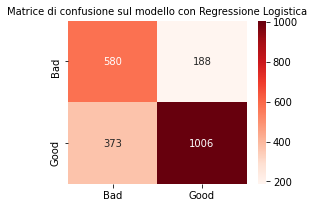

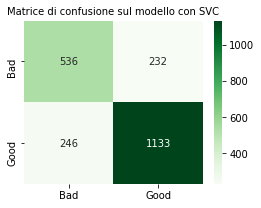

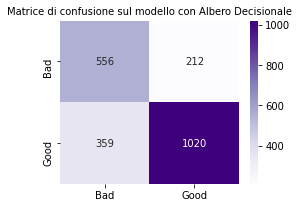

In [ ]:
plt.figure(figsize=(4, 3))
plt.title('Matrice di confusione sul modello con Perceptron', size=10)
sns.heatmap(pd.DataFrame(confusion_matrix(y_val, per_gs.predict(X_val)), columns=per_gs.classes_, index = per_gs.classes_), 
            annot=True, cmap='Oranges', fmt='d');

plt.figure(figsize=(4, 3))
plt.title('Matrice di confusione sul modello con Regressione Logistica', size=10)
sns.heatmap(pd.DataFrame(confusion_matrix(y_val, log_gs.predict(X_val)), columns=log_gs.classes_, index = log_gs.classes_), 
            annot=True, cmap='Reds', fmt='d');

plt.figure(figsize=(4, 3))
plt.title('Matrice di confusione sul modello con SVC', size=10)
sns.heatmap(pd.DataFrame(confusion_matrix(y_val, svc_gs.predict(X_val)), columns=svc_gs.classes_, index = svc_gs.classes_), 
            annot=True, cmap='Greens', fmt='d');

plt.figure(figsize=(4, 3))
plt.title('Matrice di confusione sul modello con Albero Decisionale', size=10)
sns.heatmap(pd.DataFrame(confusion_matrix(y_val, tree_gs.predict(X_val)), columns=tree_gs.classes_, index = tree_gs.classes_), 
            annot=True, cmap='Purples', fmt='d');

## Valutazione modelli con Intervallo di confidenza

Produciamo ora un confronto con intervallo di confidenza per quantificare l'accuratezza dei modelli. Fissiamo quindi la percentuale di certezza al 95%.

In [ ]:
def confidence(acc, N, Z=1.96):
    den = (2*(N+Z**2))
    var = (Z*np.sqrt(Z**2+4*N*acc-4*N*acc**2)) / den
    a = (2*N*acc+Z**2) / den
    inf = a - var
    sup = a + var
    return (inf, sup)

def calculate_accuracy(conf_matrix):
    return np.diag(conf_matrix).sum() / conf_matrix.sum().sum()

In [ ]:
name_model = {
    'per': 'Perceptron',
    'log': 'LogisticRegression',
    'svc': 'Support Vector Machines',
    'tree': 'Decision Tree'
}

for model in models.values():
  print(name_model[list(model.named_steps.keys())[1]] +
        ": Estremo inferiore %0.6f" % 
         confidence(calculate_accuracy(confusion_matrices[list(model.named_steps.keys())[1]]), len(X_val))[0])
  
  print(name_model[list(model.named_steps.keys())[1]] +
        ": Estremo superiore %0.6f" % 
         confidence(calculate_accuracy(confusion_matrices[list(model.named_steps.keys())[1]]), len(X_val))[1])
    
  print('\n')

Perceptron: Estremo inferiore 0.619896
Perceptron: Estremo superiore 0.660460


LogisticRegression: Estremo inferiore 0.719706
LogisticRegression: Estremo superiore 0.756851


Support Vector Machines: Estremo inferiore 0.759280
Support Vector Machines: Estremo superiore 0.794457


Decision Tree: Estremo inferiore 0.714952
Decision Tree: Estremo superiore 0.752307




## Valutazione per confronto con Modello casuale

Creiamo ora un modello casuale, utilizzando **DummyClassifier**. Questo è uno classificatore molto semplice che mette a disposizione sklearn e che può essere utile per confrontare le sue previsioni con quelle reali.

CV score: 0.48766


F1 score: 0.54807


Precision score: 0.63223


Recall score: 0.48368




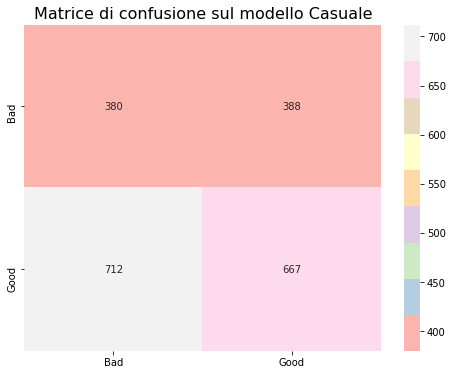

In [ ]:
from sklearn.dummy import DummyClassifier

#strategy="uniform" garantisce uniformità randomica nella predizione
rand_mod = DummyClassifier(random_state=42,strategy="uniform")
rand_mod.fit(X_train_bal, y_train_bal)

print('CV score: {:.5f}'.format(rand_mod.score(X_val, y_val)))
print('\n')
print('F1 score: {:.5f}'.format(f1_score(y_val, rand_mod.predict(X_val), pos_label='Good')))
print('\n')
print('Precision score: {:.5f}'.format(precision_score(y_val, rand_mod.predict(X_val), pos_label='Good')))
print('\n')
print('Recall score: {:.5f}'.format(recall_score(y_val, rand_mod.predict(X_val), pos_label='Good')))
print('\n')
plt.figure(figsize=(8, 6))
plt.title('Matrice di confusione sul modello Casuale', size=16)
sns.heatmap(pd.DataFrame(confusion_matrix(y_val, rand_mod.predict(X_val)), columns=rand_mod.classes_, index = rand_mod.classes_), 
            annot=True, cmap='Pastel1', fmt='d');

scores["rand"] = rand_mod.score(X_val, y_val);
recall["rand"] = recall_score(y_val, rand_mod.predict(X_val), pos_label='Good')
precision["rand"] = precision_score(y_val, rand_mod.predict(X_val), pos_label='Good')
f1["rand"] = f1_score(y_val, rand_mod.predict(X_val), pos_label='Good')
#models["rand"] = rand_mod
confusion_matrices["rand"] = pd.DataFrame(confusion_matrix(y_val, rand_mod.predict(X_val)), columns=rand_mod.classes_, index = rand_mod.classes_)

In [ ]:
from scipy import stats

def difference_between_two_models(error1, error2, confidence):
    z_half_alfa = stats.norm.ppf(confidence)
    variance = (((1 - error1) * error1) / len(y_val)) + (((1 - error2) * error2) / len(y_val))
    d_minus = abs(error1 - error2) - z_half_alfa * (pow(variance, 0.5))
    d_plus = abs(error1 - error2) + z_half_alfa * (pow(variance, 0.5))
    print("Valore minimo: {}\nValore massimo: {}\n".format(d_minus, d_plus))

for model in models.values():
  print(name_model[list(model.named_steps.keys())[1]] + " VS Modello Random")
  print("\n")
  difference_between_two_models(1 - f1[list(model.named_steps.keys())[1]], 1 - f1["rand"], 0.99)

Perceptron VS Modello Random


Valore minimo: 0.12899242119888013
Valore massimo: 0.1965923808716624

LogisticRegression VS Modello Random


Valore minimo: 0.20143053174889308
Valore massimo: 0.2663645758423912

Support Vector Machines VS Modello Random


Valore minimo: 0.2463169258758151
Valore massimo: 0.3091485282950541

Decision Tree VS Modello Random


Valore minimo: 0.20075944188754274
Valore massimo: 0.26572219968513483



Ora abbiamo la certezza al 99% che i diversi modelli addestrati siano migliori di un modello casuale: nessuno dei valori che possiamo visualizzare contiene lo 0.

Risulta ormai evidente come il modello migliore sia quello addestrato con **Support Vector Machines**.

# Confronto finale e Conclusioni

Individuato il modello SVM come quello migliore analizziamolo.

 Per individuare l'iperpiano di separazione migliore tra le due classi, SVM si basa sulle istanze più vicine ad esso, i cosiddetti **Support Vector**. Vediamo quindi quali features sono più positivamente/negativamente correlate e in che misura con la variabile *quality*. 

Vediamo prima quante istanze son stato necessarie per individuare l'iperpiano:

In [ ]:
len(models['svc'][1].support_)

3493

Come notiamo le istanze utilizzate son molteplici (come si nota sotto, circa il 64%), questo indica come una divisione netta e precisa tra le due classi sia difficile da individuare. Ancora più complicato per modelli lineare come Perceptron: un altro motivo per la sua scarsa precisione.

In [ ]:
len(models['svc'][1].support_)  / len(X_train_bal) * 100

64.80519480519482

Per visualizzare meglio il tutto possiamo definire una funzione che ci permetta di capire quanti punti siano stati usati per definire l'iperpiano. Plottando i punti che abbiamo usato per il training e quelli usati dal support vector, vedremo come molti combacino

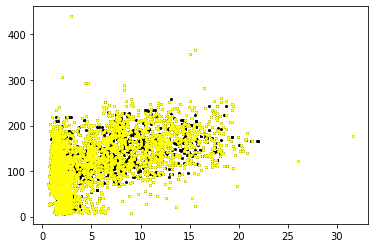

In [ ]:
def plot_data_and_support(X, model):

    #in Xs metto tutte le righe e colonne di X che hanno indice preso da model.support_
    Xs = X.iloc[model.support_]
    #print(Xs)

    plt.scatter(X.iloc[:, 3], X.iloc[:, 6], s=4, c='black')
    plt.scatter(Xs.iloc[:, 3], Xs.iloc[:, 6], s=4, c='yellow')

plot_data_and_support(X_train_bal, models['svc'][1])

Infine scopriamo quale feature son state più o meno rilevanti per i nostri scopi di classificazione.

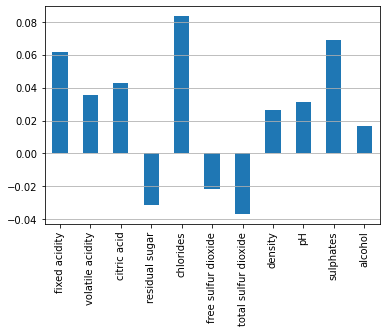

In [ ]:
support_dataframe = pd.DataFrame(models['svc'][1].support_vectors_, columns=X_train_bal.columns)
#support_dataframe.describe()

mean = pd.Series([0.061903,0.035754,0.043108,-0.031508,0.083313,-0.021621,-0.036785,0.026544,0.031376,0.069159,0.016729], index= X_train_bal.columns)
mean.plot.bar()
plt.grid(axis="y")


Come si era previsto nella fase esplorativa dei dati, tutte le features hanno un peso più o meno significativo sul risultato del modello, è quindi importante considerarle tutte per determinare se un vino è buono o cattivo.

In definitiva considerando i valori ottenuti dal modello, ci riteniamo molto soddisfatti di questa nostra prima esperienza nel mondo del Data Science. Le valutazioni affrontate nel finale del documento ci mostrano come il modello SVM possa essere un ottimo strumento di supporto per la classificazione di un vino buono o cattivo. 

E' stato scelto questo dataset dal momento che la famiglia di un membro del team di questo progetto (Romagnoli Giacomo) è proprietaria di un'azienda vinicola. Ci immaginiamo ad esempio che un'azienda come quella possa utilizzare questo dispositivo per scremare in un primo momento i vini buoni da quelli cattivi per poi farli assaggiare ad un ipotetico somelier che ne giudicherà l'effettiva bontà.